In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [18]:
g1 = tf.Graph()
with g1.as_default() as graph:
    
    nb_classes = 10
    
    X = tf.compat.v1.placeholder(tf.float32, [None, 784])
    Y = tf.compat.v1.placeholder(tf.float32, [None, nb_classes])
    
    rate = tf.compat.v1.placeholder(tf.float32)
    
    #W = tf.Variable(tf.compat.v1.random_normal([784, nb_classes]), name = 'weight')
    #b = tf.Variable(tf.compat.v1.random_normal([nb_classes]), name = 'bias')
    #hypothesis = tf.matmul(X, W) + b
    
    #W1 = tf.Variable(tf.compat.v1.random_normal([784, 256]), name = 'weight1')
    W1 = tf.compat.v1.get_variable("W1", shape=[784, 512], initializer=tf.initializers.glorot_normal())
    #W1 = tf.compat.v1.get_variable("W1", shape=[784, 512])
    b1 = tf.Variable(tf.compat.v1.random_normal([512]), name = 'bias1')
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    L1 = tf.nn.dropout(L1, rate=rate)
    
    #W2 = tf.Variable(tf.compat.v1.random_normal([256, 256]), name = 'weight2')
    W2 = tf.compat.v1.get_variable("W2", shape=[512, 512], initializer=tf.initializers.glorot_normal())
    #W2 = tf.compat.v1.get_variable("W2", shape=[512, 512])
    b2 = tf.Variable(tf.compat.v1.random_normal([512]), name = 'bias2')
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    L2 = tf.nn.dropout(L2, rate=rate)
    
    #W3 = tf.Variable(tf.compat.v1.random_normal([256, nb_classes]), name = 'weight3')
    W3 = tf.compat.v1.get_variable("W3", shape=[512, 512], initializer=tf.initializers.glorot_normal())
    #W3 = tf.compat.v1.get_variable("W3", shape=[512, 512])
    b3 = tf.Variable(tf.compat.v1.random_normal([512]), name = 'bias3')
    L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
    L3 = tf.nn.dropout(L3, rate=rate)
    
    W4 = tf.compat.v1.get_variable("W4", shape=[512, 512], initializer=tf.initializers.glorot_normal())
    #W4 = tf.compat.v1.get_variable("W4", shape=[512, 512])
    b4 = tf.Variable(tf.compat.v1.random_normal([512]), name = 'bias4')
    L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
    L4 = tf.nn.dropout(L4, rate=rate)

    W5 = tf.compat.v1.get_variable("W5", shape=[512, nb_classes], initializer=tf.initializers.glorot_normal())
    #W5 = tf.compat.v1.get_variable("W5", shape=[512, nb_classes])
    b5 = tf.Variable(tf.compat.v1.random_normal([nb_classes]), name = 'bias5')
    hypothesis = tf.matmul(L4, W5) + b5
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
    
    prediction = tf.argmax(hypothesis, 1)
    is_correct = tf.equal(prediction, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))    
    
    init_op = tf.compat.v1.global_variables_initializer()
    
    r = random.randint(0, mnist.test.num_examples - 1)
    test = tf.argmax(mnist.test.labels[r:r+1], 1)
    
sess = tf.compat.v1.Session(graph = g1)
sess.run(init_op)

In [19]:
training_epocs = 15
batch_size = 100

for epoch in range(training_epocs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys, rate: 0.3})
        avg_cost += c / total_batch
    print('Epoch : ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
print("Accuracy : ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels, rate: 0.0}))   

Epoch :  0001 cost =  0.475093287
Epoch :  0002 cost =  0.176388608
Epoch :  0003 cost =  0.131657446
Epoch :  0004 cost =  0.108965402
Epoch :  0005 cost =  0.096305183
Epoch :  0006 cost =  0.083829229
Epoch :  0007 cost =  0.075330100
Epoch :  0008 cost =  0.074292538
Epoch :  0009 cost =  0.065087292
Epoch :  0010 cost =  0.058756636
Epoch :  0011 cost =  0.056228860
Epoch :  0012 cost =  0.055048858
Epoch :  0013 cost =  0.048236312
Epoch :  0014 cost =  0.046268388
Epoch :  0015 cost =  0.046672601
Accuracy :  0.982


Label :  [0]
Prediction :  [0]


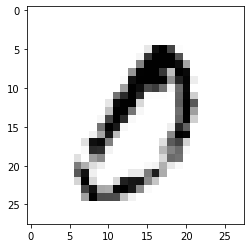

In [31]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label : ", np.argmax(mnist.test.labels[r:r+1], 1))
print("Prediction : ", sess.run(prediction, feed_dict={X: mnist.test.images[r:r+1], rate: 0.0}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()